# **Author : Devarsh Patel**

# Task 2 : Prediction using Unsupervised Machine Learning

**GRIP @ The Sparks Foundation**

To predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset using K-means clustering

Dataset is standard Iris dataset that can be loaded through scikit-learn datasets

**Importing Libraries**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

**Importing Dataset**

In [25]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df = df.drop('Id', axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [29]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [30]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [31]:
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


We have 3 duplicate row. But we leave them as it is 'cause it would disrupt balance of class frequency.

In [32]:
df.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [33]:
df.kurt()

SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64

In [34]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

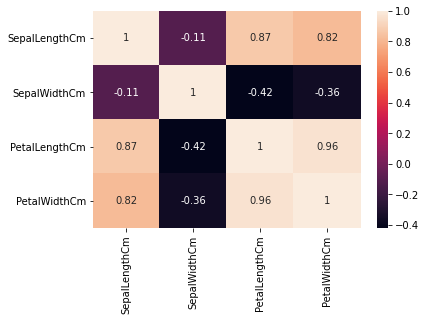

In [35]:
sns.heatmap(df.corr(), annot=True)

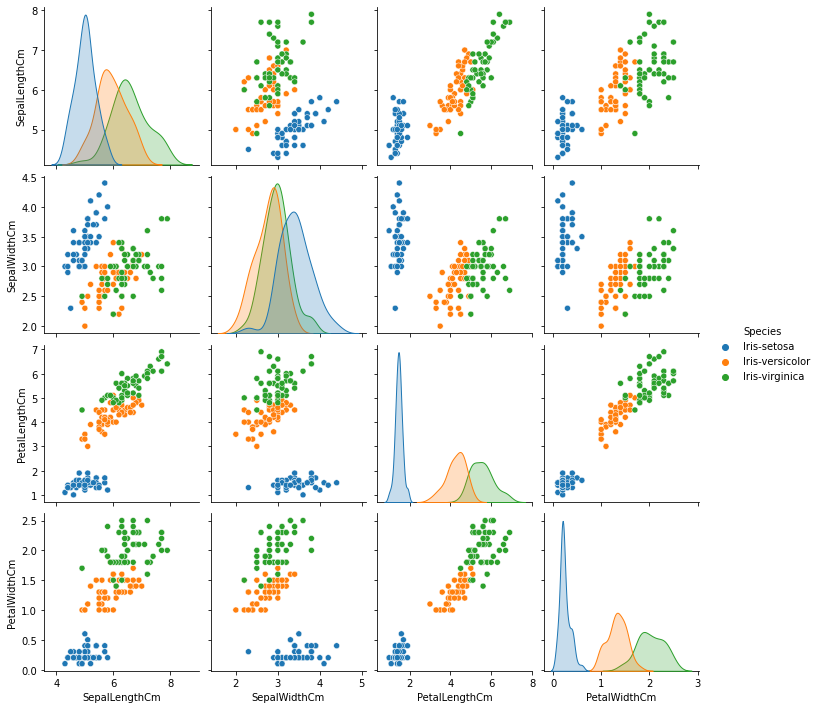

In [36]:
sns.pairplot(df,hue="Species")

Setosa is easily separable among three. Versicolor and Virgininca doesn't separate out that nicely into different cluster.

**KDE distribution of features**

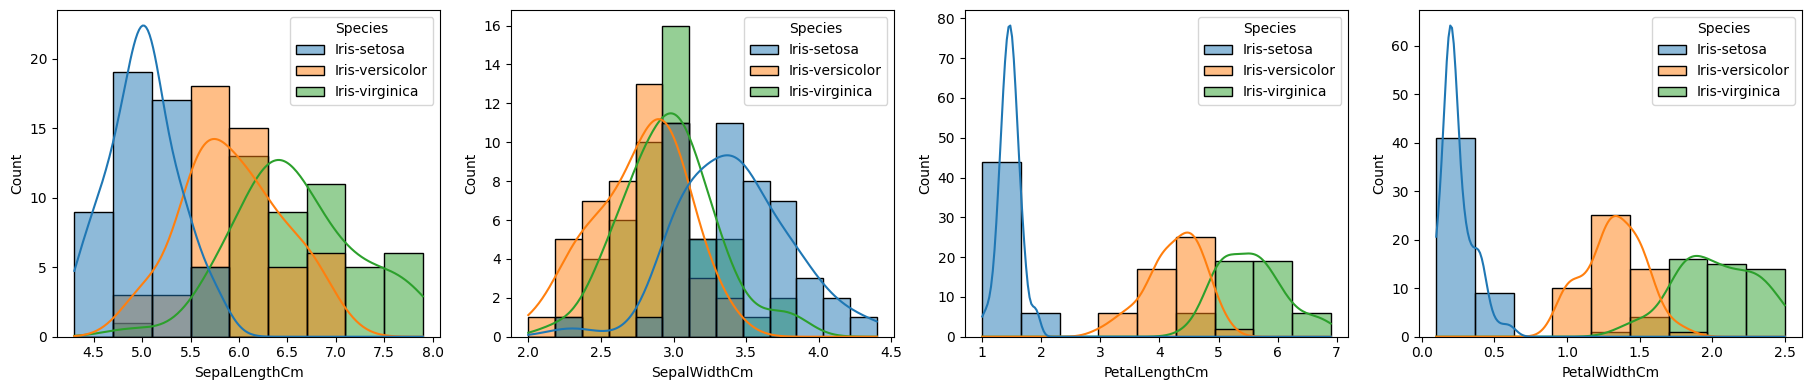

In [37]:
plt.figure(figsize=(50, 4), dpi=100)
i = 1

for col in df.columns[:-1]:
    plt.subplot(1, 11, i)
    sns.histplot(df, x=col, hue='Species', kde=True)
    i = i + 1
plt.tight_layout()
plt.show()

# K-means clustering

## Data Pre-processing

In [103]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X = df.iloc[:, :-1].values
y = le.fit_transform(df['Species'])

In [104]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [105]:
X.shape, y.shape

((150, 4), (150,))

## K-means algorithm

We know there are 3 species present in dataset. Still we will use Elbow-method to get optimum value of k

In [107]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=43)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

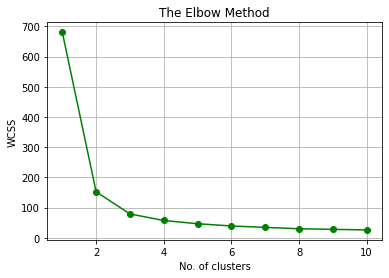

In [116]:
plt.plot(range(1, 11), wcss, marker='o', color='green')
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.grid('on')

We would be no of clusters k=3 because after k=3, WCSS decreases with smaller rate. 

In [109]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=2021)
y_pred = kmeans.fit_predict(X)

In [110]:
print("Accuracy of our model : ", round(sum(y == y_pred) / 1.5, 2))

Accuracy of our model :  89.33


In [111]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Plotting prediction and comparing with actual data

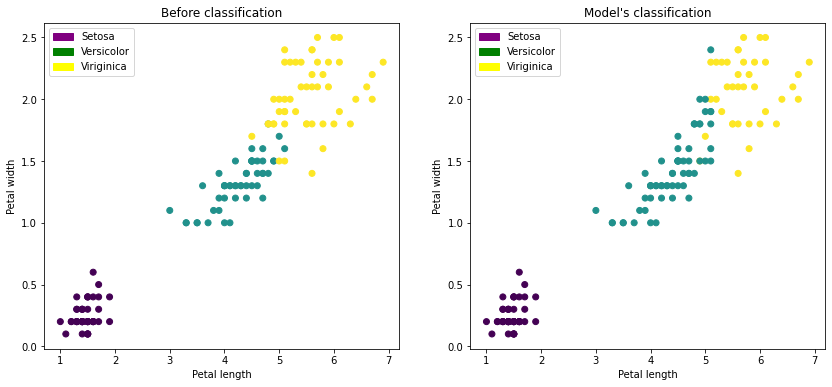

In [117]:
plt.figure(figsize=(14, 6))

colors = np.array(['red', 'green', 'blue'])

y_pred = np.choose(kmeans.labels_, [0, 1, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=y)
plt.title('Before classification')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

setosa = mpatches.Patch(color='purple', label='Setosa')
versicolor = mpatches.Patch(color='green', label='Versicolor')
virginica = mpatches.Patch(color='yellow', label='Viriginica')
plt.legend(handles=[setosa, versicolor, virginica])

plt.subplot(1, 2, 2)
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=y_pred)
plt.title("Model's classification")
plt.xlabel('Petal length')
plt.ylabel('Petal width')

setosa = mpatches.Patch(color='purple', label='Setosa')
versicolor = mpatches.Patch(color='green', label='Versicolor')
virginica = mpatches.Patch(color='yellow', label='Viriginica')
plt.legend(handles=[setosa, versicolor, virginica])

# Observing misclassification

In [114]:
cross = pd.crosstab(y, y_pred, colnames=["Predicted"], rownames=["Original"])

In [115]:
cross.rename({
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'},
             
    axis='index',
    inplace=True)

cross.rename({
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'},
             
    axis='columns')

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica
Original,,,
Iris-setosa,50,0,0
Iris-versicolor,0,48,2
Iris-virginica,0,14,36


Algorithm correctly predicted setosa with 0 misclassification. However, k-means misidentified 2 data points from versicolor set as virginica. And in virginca set, misclassification is 14/36 (or 39%). This can be further improved by collecting more.

# Thank you